# Programmation Python

[**Paul Liautaud**](https://perso.lpsm.paris/~liautaud) à [Sorbonne Université](http://www.sorbonne-universite.fr/)

# Algèbre Linéaire 2 - Objectif Concours

<div id="ch:algebre"></div>

Ce TP permet de faire un résumé des outils essentiels au traitement de problèmes classiques en *Algèbre Linéaire*.

>**Concepts abordés:**
>* Manipulations de vecteurs et matrices à l'aide de Numpy 
>* Module `linalg` de Numpy
>* Résolution de systèmes par pivot de Gauss, rang d'un.e sytème/matrice
>* Réduction d'endomorphismes : notions de spectre, valeurs et vecteurs propres

# Exercice 1

Sans rentrer les coefficients un à un, déclarer les matrices suivantes à l'aide de Numpy : $$A = \begin{pmatrix} 5 &3 &3 \\ 3& 5 & 3 \\ 3 &3 &5\end{pmatrix}, \quad B= \begin{pmatrix} 1 &0 &0 & 0\\ 0 &1 &0 & 0\\0 &0 &1 & 0\\0 &0 &0 & 1\end{pmatrix}.$$

# Exercice 2

Que vaut le produit d'un vecteur colonne $\begin{pmatrix} a_1 \\ \vdots \\ a_n\end{pmatrix}$ par le vecteur ligne $\begin{pmatrix} 1 & \cdots & 1 \end{pmatrix}$ ?

En déduire une ligne de commande qui crée la matrice $$M = \begin{pmatrix} 1 &1 & \cdots & 1\\ 2 &2 & \cdots & 2 \\ \vdots & \vdots & &\vdots \\ 10 &10 & \cdots & 10 \end{pmatrix} \in \mathcal M_{10}(\mathbb R).$$

# Exercice 3

**1.** On définit la matrice $A = \begin{pmatrix} 1& 1& 2& 0 \\ 1 & -1 & 0 & -2 \\ 0& 1& 1& 1 \\ 1& 0& 1& -1\end{pmatrix}$.

**1.a)** Déclarer la matrice $A$.

**1.b)** Appliquer l'algorithme du pivot de Gauss à l'aide de Python (on effectuera chacune des opérations élémentaires dans le script). En déduire le rang.

**1.c)** Vérifier votre résultat à l'aide de la fonction `matrix_rank` du module `linalg`.

**2.** On considère à présent la matrice $B = \begin{pmatrix} 1 &1 &0 \\ 1 &-1 &1 \\ 1 &0 &1\end{pmatrix}$.

**2. a)** Déclarer la matrice $B$. Vérifier que $B$ est inversible et calculer son inverse à l'aide de Python.

**2. b)** Résoudre à l'aide de Python le système $$\begin{cases}x+y &= 1 \\ x-y+z &=3 \\ x+z &= -2\end{cases}.$$

# Problème (d'après HEC)

## Quesitons préliminaires

On considère une matrice $M \in \mathcal M_n(\mathbb R)$ telle que $M = (m_{ij})_{1 \leq i,j \leq n}$. On note alors $f$ l'endomorphisme de $\mathbb R^n$ canoniquement associé à $M$.

*Notations :* $M^\top$ est la transposée de la matrice $M$, $\operatorname{Tr}$ désigne la forme linéaire trace appliquable à une matrice de $\mathcal{M}_n (\mathbb R)$.

**1.** On suppose que chaque ligne de la matrice $M$ somme à $1$. Que peut-on alors en déduire sur les valeurs propres de $f$ ?

**2.** On suppose ensuite que la somme des coefficients de chaque colonne de $M$ est égale à $1$. Montrer alors que $1$ est valeur propre de $f$.

**3.** Plus généralement, montrer que les valeurs propres de $M$ sont les mêmes que celles de $M^\top$ et que les sous-espaces propres associés ont mêmes dimensions.

**4.** On suppose que $M$ est diagonalisable, i.e. elle est semblable à une matrice diagonale $D$. Que dire de $\operatorname{Tr}(M)$ et $\operatorname{Tr}(D)$ ?

**5.** Montrer que si $f$ est diagonalisable et n'admet qu'une seule valeur propre $\lambda \in \mathbb R$, alors $f = \lambda \operatorname{Id}$. 

## Évolution d'une population

On considère deux populations distinctes $A$ et $B$ ayant un effectif total de $100 000$ individus. À l'instant $n=1$, on considère que $A$ est peuplée de $30 000$ individus, puis à chaque étape $n\geq 2$, une partie de la population $A$ est transférée vers $B$, et inversement suivant la règle d'échange donnée dans le programme suivant :

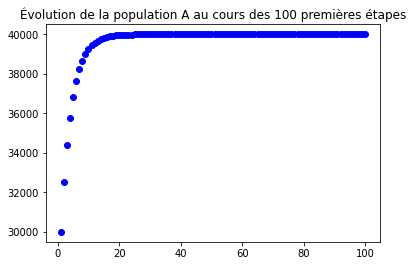

In [1]:
import matplotlib.pyplot as plt
import numpy as np
n = 100
A = np.zeros(n)
B = np.zeros(n)
A[0] = 30000
B[0] = 100000 - A[0]
for i in range(n-1):
    A[i+1] = 0.85 * A[i] + 0.1 * B[i]
    B[i+1] = 0.15 * A[i] + 0.9 * B[i]

x = range(1,n+1)
plt.scatter(x, A, color='b', marker='o')
plt.title('Évolution de la population A au cours des 100 premières étapes');

**Question :** Commenter le script et l'allure de la courbe représentée ci-dessus. Compléter le script pour afficher lévolution de la population $B$. 

<br> On va maintenant démontrer le résultat conjecturé.

### Expression matricielle du problème

On note alors $X_n = \begin{pmatrix} a_n \\ b_n \end{pmatrix}$, où $a_n$ et $b_n$ sont respectivement le nombre d'individus occupant la population $A$ et $B$ à chaque instant $n \geq 1$.

**1.** Donner $X_1$, puis déterminer une matrice $M \in \mathcal{M}_2(\mathbb R)$ telle que $$\forall n\geq 1, X_{n+1} = MX_n.$$
**2.** En déduire une relation de récurrence explicite sur $(X_n)$ en fonction de $M$ et $X_1$.

**3.** On suppose que les suites $(a_n)$ et $(b_n)$ admettent des limites finies respectivement notées $a_\infty$ et $b_\infty$. <br>
    **a)** On note alors $X_\infty = \begin{pmatrix} a_\infty \\ b_\infty \end{pmatrix}$. Montrer que $X_\infty$ est nécéssairement un vecteur propre de $M$ pour la valeur propre $1$.<br>
    **b)** Déterminer le sous-espace propre de $M$ pour la valeur propre $1$. En déduire les valeurs possibles de $a_\infty$ et $b_\infty$.
    
### Diagonalisation de $M$ et calcul de $M^n$

**1.** On note $f$ l'endomorphisme de $\mathbb R^2$ canoniquement associé à la matrice $M$. Montrer alors que $1$ est une valeur propre de $f$ et donner un élément non nul de $\operatorname{Ker}\left( f - \operatorname{Id}_{\mathbb R^2}\right)$.

**2.** Montrer que $f$ admet une autre valeur propre que l'on déterminera.

**3.** En déduire une base $\mathcal B'$ de $\mathbb R^2$ telle que la matrice $f$ dans cette base soit une matrice diagonale $D$ que l'on explicitera.

**4.** Déterminer la matrice $P$ de passage de la base canonique $\mathcal B$ de $\mathbb R^2$ vers $\mathcal B'$.

**5.** En utilisant un script Python, calculer $D = P^{-1}MP$.

**6.** Montrer que : $$\forall n \geq 1, \quad M^n = PD^nP^{-1}.$$

### Résolution du problème

**1.** Montrer que $\lim_{n \to +\infty} M^n$ existe. En déduire $\lim_{n \to +\infty} a_n$ et $\lim_{n \to \infty} b_n$.

**2.** Asymptotiquement, quelle sera alors la répartition des individus dans chacune des populations ?

### Généralisation de l'étude à trois populations

On suppose désormais que trois populations $A$, $B$ et $C$ co-existent et évoluent selon la dynamique donnée par : $$\begin{pmatrix} a_{n+1} \\ b_{n+1} \\ c_{n+1} \end{pmatrix} = \begin{pmatrix} 0.1 & 0.5 & 0.3 \\ 0.2 & 0.3 & 0.1 \\ 0.7 & 0.2 & 0.6\end{pmatrix}\begin{pmatrix} a_{n} \\ b_{n} \\ c_{n} \end{pmatrix}.$$

Que peut-on penser de $\lim_{n \to +\infty} a_n, \lim_{n \to +\infty} b_n$ et $\lim_{n \to +\infty} c_n$ ?

***Hint:*** On pourra utilser la fonction `eig` du module `numpy.linalg`.